# E-tivity 3: Linear Regression

## Name: Martin Power
## ID      : 9939245

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split

# My imports
import pandas as pd

In [2]:
class MyLinReg(object):
    
    def __init__ (self, n_weights):
        self.weights = np.zeros([(n_weights+1),])
        
    def fit(self,X,y):
        X_1s = np.c_[np.ones([X.shape[0],1]),X]
        X_1s_dagger = np.linalg.pinv(X_1s)
        self.weights = np.matmul(X_1s_dagger,y)
        
    def predict(self,X):
        X_1s = np.c_[np.ones([X.shape[0],1]),X]
        #yhat = np.sign(np.matmul(X_1s,self.weights)) # <-- Used for classifier
        yhat = np.matmul(X_1s,self.weights)           # <-- Used for regression 
        
        return yhat
      
    def mse(self,X,y):
        yhat = self.predict(X)
        se = 0.0 

        for i in range(len(y)):

            se+=(yhat[i]-y[i])**2
        
        if(se!=0.0):
            mse = se/len(y)
        else:
            mse = se
        return mse
    
    # For reference and comparison from sklearn classifier classes
    # Remove for final submission! TODO
    def mse_metrics(self,X,y):
        from sklearn.metrics import mean_squared_error
        return mean_squared_error(y, self.predict(X))
    

In [3]:
# Generic Mean Squared Error Function
def mse(y,yhat):
    se = 0.0 

    for i in range(len(y)):
        se+=(yhat[i]-y[i])**2

    if(se!=0.0):
        mse = se/len(y)
    else:
        mse = se
    
    return mse

In [4]:
# Use this variable to make random methods reproducible
# Set to None for full randomness
# Set to an integer value for repeatability
RANDOM_STATE = 0

TEST_SIZE = 0.2

In [5]:
df = pd.read_csv("./Task4.csv")

print("Number of Samples  in Dataset:\t",df.shape[0])
print("Number of Features in Dataset:\t",df.shape[1])

Number of Samples  in Dataset:	 100
Number of Features in Dataset:	 2


In [6]:
# Print statistical summary for all attributes
df.describe(include='all')

,X,y
count,100.000000,100.000000
mean,0.499995,0.786404
std,0.293037,0.396402
min,0.000000,-0.347000
25%,0.250250,0.639750
50%,0.500000,0.928000
75%,0.749750,1.075000
max,1.000000,1.270000


In [7]:
X = df['X'].values
X = np.expand_dims(X, axis=1)
y = df['y'].values

In [8]:
print(X.shape)
print(y.shape)

(100, 1)
(100,)


In [9]:
print(y)

[-0.308  -0.347  -0.0937 -0.286  -0.0927 -0.0335 -0.0472 -0.0789  0.146
  0.238   0.196   0.0944  0.259   0.32    0.256   0.333   0.478   0.552
  0.412   0.563   0.541   0.471   0.492   0.642   0.686   0.654   0.663
  0.82    0.754   0.919   0.845   0.871   0.95    1.      0.949   0.999
  0.905   0.947   1.05    1.07    1.06    1.07    1.13    1.07    0.998
  1.04    1.16    1.1     1.23    1.19    1.11    1.06    1.13    1.22
  1.13    1.25    1.11    1.07    1.12    1.12    1.21    1.23    1.18
  1.27    1.14    1.14    1.21    1.2     1.02    1.19    1.13    1.03
  0.993   0.943   0.971   0.95    1.09    0.964   1.09    0.958   0.948
  0.912   0.937   0.814   1.02    0.918   0.864   0.808   0.864   0.68
  0.76    0.662   0.742   0.684   0.762   0.685   0.649   0.662   0.633
  0.571 ]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# Linear Regression on Original Test Data

In [11]:
mlr_orig = MyLinReg(X_train.shape[1])
mlr_orig.fit(X_train,y_train)

In [12]:
yhat_orig_train = mlr_orig.predict(X_train)
yhat_orig_test = mlr_orig.predict(X_test)

In [13]:
print(y_train[3])

1.03


In [14]:
mlr_orig_train_mse = mlr_orig.mse(X_train,y_train)
mlr_orig_test_mse  = mlr_orig.mse(X_test,y_test)

print("Training MSE :\t",mlr_orig_train_mse)
print("Test     MSE :\t",mlr_orig_test_mse)

Training MSE :	 0.1042692674644882
Test     MSE :	 0.09708951737742094


In [15]:
# Debug
print(mlr_orig.mse_metrics(X_train,y_train))
print(mlr_orig.mse_metrics(X_test,y_test))

0.10426926746448821
0.09708951737742096


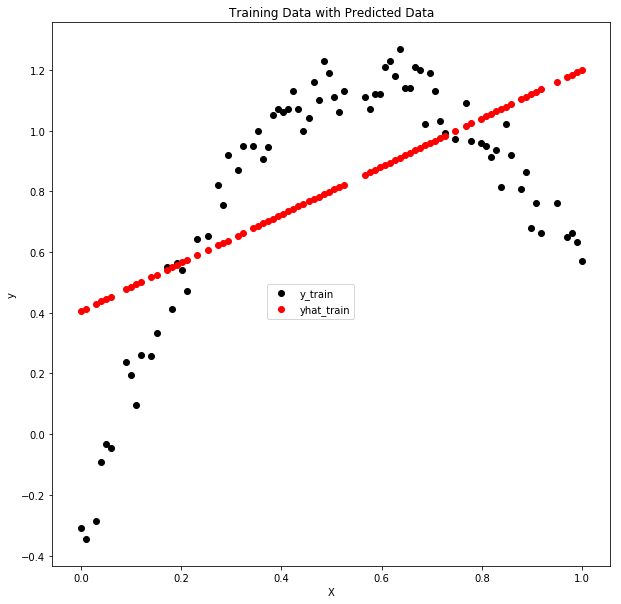

In [16]:
# Plot Training Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Training Data with Predicted Data")
plt.ylabel('y')
plt.xlabel('X')
plt.scatter(X_train, y_train, color='k', label='y_train') 
plt.scatter(X_train, yhat_orig_train,color='r',label='yhat_train') 
plt.figlegend(loc='center')

plt.show() 

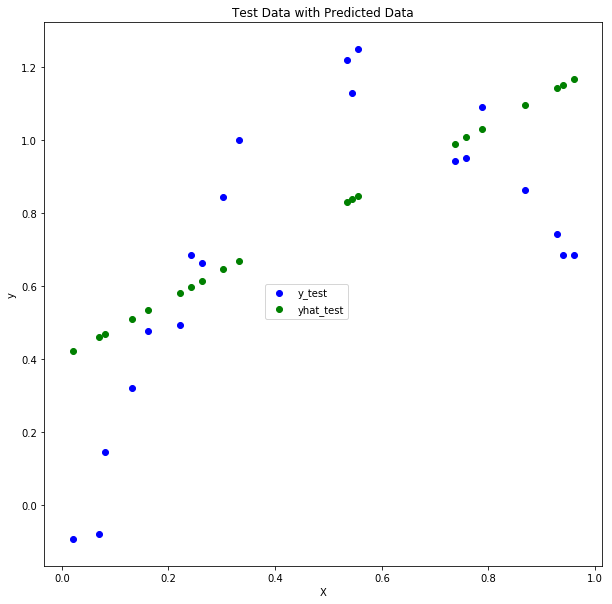

In [17]:
# Plot Test Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Test Data with Predicted Data")
plt.ylabel('y')
plt.xlabel('X')
plt.scatter(X_test, y_test,color='b', label='y_test') 
plt.scatter(X_test, yhat_orig_test,color='g',label='yhat_test') 
plt.figlegend(loc='center')
plt.show() 

# Add Additional Features

## Adding x^2
Looking at the training data (and being guilty of data snooping), the function has the shape of a parabola.
Exercise 3.13 in "Learning from Data" gives equations for the following types of boundaries:
* Parabola
* Circle
* Ellipse
* Hyperbola
* Line

Using the graphing calculator at https://www.desmos.com/calculator, I used these equations to get a feel for what the different boundaries look like when plotted.

From experimenting with this, I can see that a general equation for a parabola can be captured as:
ax^2 + bx + c = y

I already have the "x" feature so I am going to add the "x^2" feature and see if the linear regression can learn suitable "a", "b" and "c" values to apporximate y

In [18]:
df['Xsqrd'] = (X)**2

In [19]:
df.describe(include='all')

,X,y,Xsqrd
count,100.000000,100.000000,100.000000
mean,0.499995,0.786404,0.335007
std,0.293037,0.396402,0.302833
min,0.000000,-0.347000,0.000000
25%,0.250250,0.639750,0.062648
50%,0.500000,0.928000,0.250025
75%,0.749750,1.075000,0.562148
max,1.000000,1.270000,1.000000


In [20]:
df.head()

,X,y,Xsqrd
0,0.0000,-0.3080,0.000000
1,0.0101,-0.3470,0.000102
2,0.0202,-0.0937,0.000408
3,0.0303,-0.2860,0.000918
4,0.0404,-0.0927,0.001632


In [21]:
X_parab = df[['X','Xsqrd']].values

In [22]:
X_parab_train, X_parab_test, y_parab_train, y_parab_test = train_test_split(X_parab, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [23]:
mlr_parab = MyLinReg(X_parab_train.shape[1])
mlr_parab.fit(X_parab_train,y_parab_train)

In [24]:
mlr_parab_train_mse = mlr_parab.mse(X_parab_train,y_parab_train)
mlr_parab_test_mse  = mlr_parab.mse(X_parab_test,y_parab_test)

print("Training MSE :\t",mlr_parab_train_mse)
print("Test     MSE :\t",mlr_parab_test_mse)

Training MSE :	 0.004735740085299895
Test     MSE :	 0.0060387050924853684


In [25]:
# Debug
print(mlr_parab.mse_metrics(X_parab_train,y_parab_train))
print(mlr_parab.mse_metrics(X_parab_test,y_parab_test))

0.004735740085299895
0.0060387050924853684


In [26]:
yhat_parab_train = mlr_parab.predict(X_parab_train)
yhat_parab_test = mlr_parab.predict(X_parab_test)

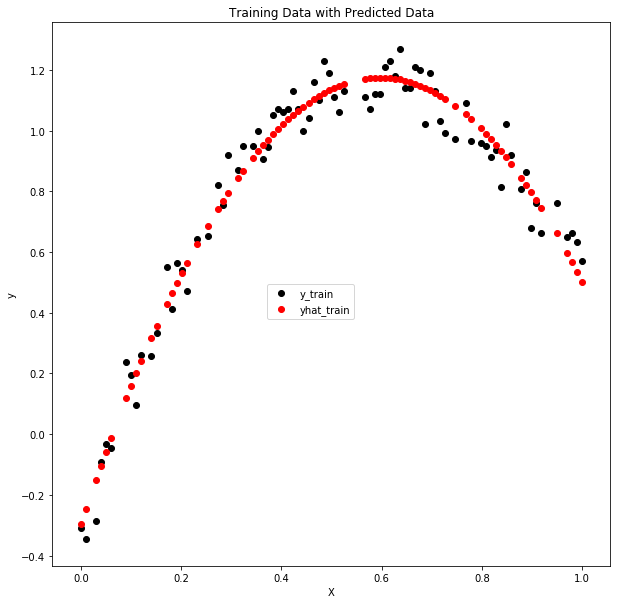

In [27]:
# Plot Training Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Training Data with Predicted Data")
plt.ylabel('y')
plt.xlabel('X')
plt.scatter(X_parab_train[:,0], y_parab_train, color='k', label='y_train') 
plt.scatter(X_parab_train[:,0], yhat_parab_train,color='r',label='yhat_train') 
plt.figlegend(loc='center')

plt.show()

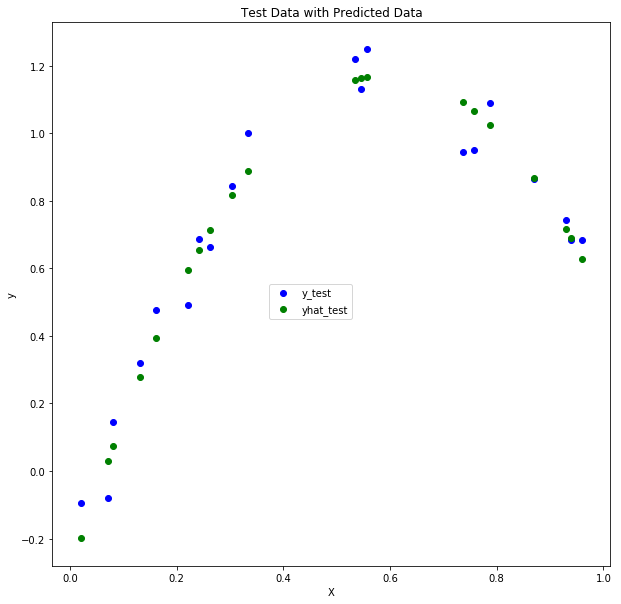

In [28]:
# Plot Test Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Test Data with Predicted Data")
plt.ylabel('y')
plt.xlabel('X')
plt.scatter(X_parab_test[:,0], y_parab_test,color='b', label='y_test') 
plt.scatter(X_parab_test[:,0], yhat_parab_test,color='g',label='yhat_test') 
plt.figlegend(loc='center')

plt.show() 

# Apply Lasso Regression Algorithm (with CV)

In [29]:
from sklearn.linear_model import LassoCV

In [30]:
lasso_cv_orig = LassoCV(alphas = None, cv = 10, max_iter = 100000, random_state=RANDOM_STATE) 

lasso_cv_orig.fit(X_train, y_train)

y_hat_lasso_cv_orig_train = lasso_cv_orig.predict(X_train)
y_hat_lasso_cv_orig_test  = lasso_cv_orig.predict(X_test)

lasso_cv_orig_train_mse = mse(y_train,y_hat_lasso_cv_orig_train)
lasso_cv_orig_test_mse  = mse(y_test,y_hat_lasso_cv_orig_test)

print("Training MSE :\t",lasso_cv_orig_train_mse)
print("Test     MSE :\t",lasso_cv_orig_test_mse)

Training MSE :	 0.10427071916267183
Test     MSE :	 0.09707643194257873


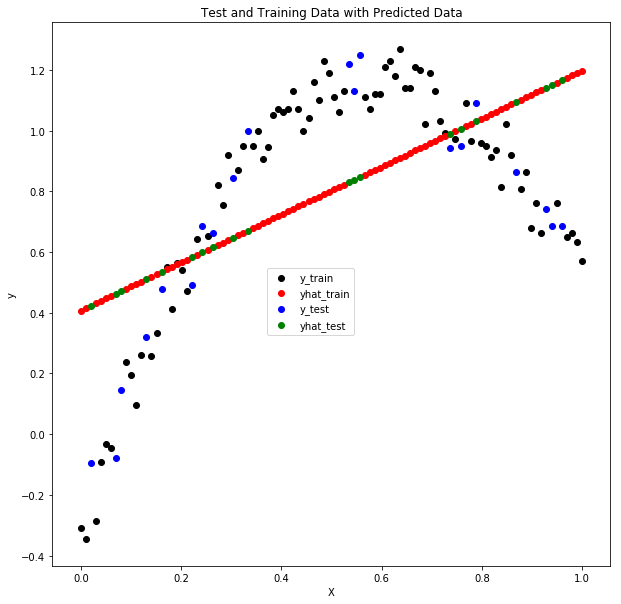

In [31]:
# Plot Training  and Test Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Test and Training Data with Predicted Data")
plt.ylabel('y')
plt.xlabel('X')
plt.scatter(X_train, y_train, color='k', label='y_train') 
plt.scatter(X_train, y_hat_lasso_cv_orig_train,color='r',label='yhat_train') 
plt.scatter(X_test, y_test,color='b', label='y_test') 
plt.scatter(X_test, y_hat_lasso_cv_orig_test,color='g',label='yhat_test') 
plt.figlegend(loc='center')

plt.show() 

In [32]:
lasso_cv_parab = LassoCV(alphas = None, cv = 10, max_iter = 100000, random_state=RANDOM_STATE) 

lasso_cv_parab.fit(X_parab_train, y_parab_train)

y_hat_lasso_cv_parab_train = lasso_cv_parab.predict(X_parab_train)
y_hat_lasso_cv_parab_test  = lasso_cv_parab.predict(X_parab_test)

lasso_cv_parab_train_mse = mse(y_parab_train,y_hat_lasso_cv_parab_train)
lasso_cv_parab_test_mse  = mse(y_parab_test,y_hat_lasso_cv_parab_test)

print("Training MSE :\t",lasso_cv_parab_train_mse)
print("Test     MSE :\t",lasso_cv_parab_test_mse)

Training MSE :	 0.004738750830816757
Test     MSE :	 0.0059980499752864645


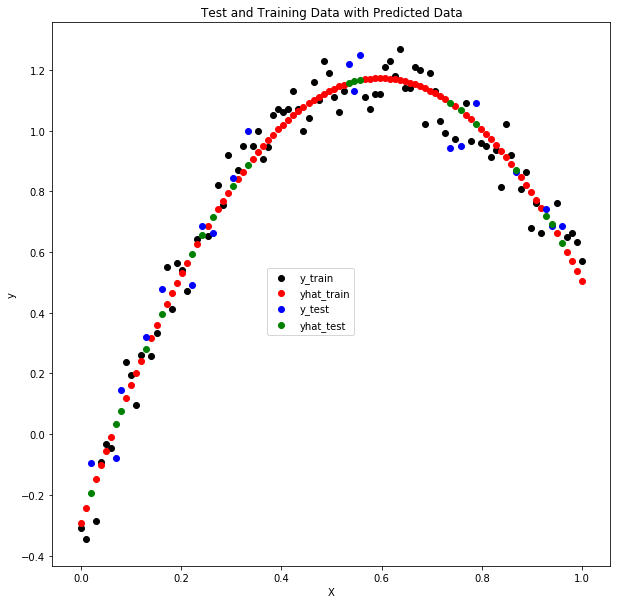

In [33]:
# Plot Training  and Test Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Test and Training Data with Predicted Data")
plt.ylabel('y')
plt.xlabel('X')
plt.scatter(X_parab_train[:,0], y_parab_train, color='k', label='y_train') 
plt.scatter(X_parab_train[:,0], y_hat_lasso_cv_parab_train,color='r',label='yhat_train') 
plt.scatter(X_parab_test[:,0], y_parab_test,color='b', label='y_test') 
plt.scatter(X_parab_test[:,0], y_hat_lasso_cv_parab_test,color='g',label='yhat_test')  
plt.figlegend(loc='center')

plt.show() 

# Apply Ridge Regression Algorithm (with CV)

In [34]:
from sklearn.linear_model import RidgeCV

In [35]:
ridge_cv_orig = RidgeCV() 

ridge_cv_orig.fit(X_train, y_train)

y_hat_ridge_cv_orig_train = ridge_cv_orig.predict(X_train)
y_hat_ridge_cv_orig_test  = ridge_cv_orig.predict(X_test)

ridge_cv_orig_train_mse = mse(y_train,y_hat_ridge_cv_orig_train)
ridge_cv_orig_test_mse  = mse(y_test,y_hat_ridge_cv_orig_test)

print("Training MSE :\t",ridge_cv_orig_train_mse)
print("Test     MSE :\t",ridge_cv_orig_test_mse)

Training MSE :	 0.10428113595543317
Test     MSE :	 0.0970619212123902


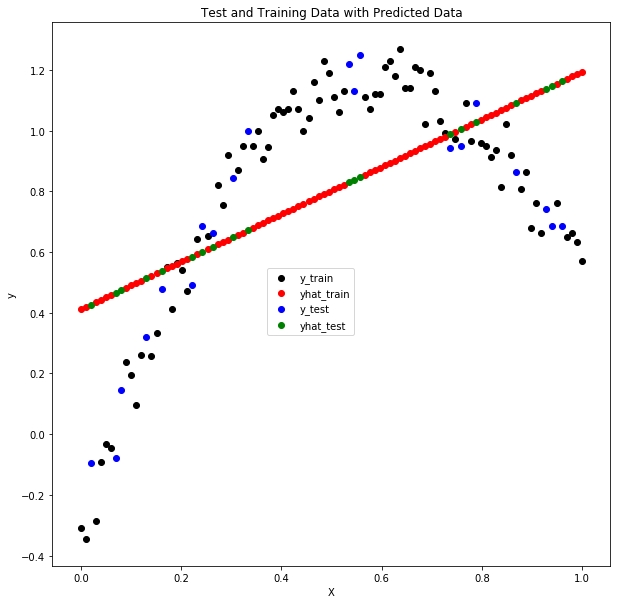

In [36]:
# Plot Training  and Test Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Test and Training Data with Predicted Data")
plt.ylabel('y')
plt.xlabel('X')
plt.scatter(X_train, y_train, color='k', label='y_train') 
plt.scatter(X_train, y_hat_ridge_cv_orig_train,color='r',label='yhat_train') 
plt.scatter(X_test, y_test,color='b', label='y_test') 
plt.scatter(X_test, y_hat_ridge_cv_orig_test,color='g',label='yhat_test') 
plt.figlegend(loc='center')

plt.show() 

In [37]:
ridge_cv_parab = RidgeCV() 

ridge_cv_parab.fit(X_parab_train, y_parab_train)

y_hat_ridge_cv_parab_train = ridge_cv_parab.predict(X_parab_train)
y_hat_ridge_cv_parab_test  = ridge_cv_parab.predict(X_parab_test)

ridge_cv_parab_train_mse = mse(y_parab_train,y_hat_ridge_cv_parab_train)
ridge_cv_parab_test_mse  = mse(y_parab_test,y_hat_ridge_cv_parab_test)

print("Training MSE :\t",ridge_cv_parab_train_mse)
print("Test     MSE :\t",ridge_cv_parab_test_mse)

Training MSE :	 0.01565797568033097
Test     MSE :	 0.014263798864580946


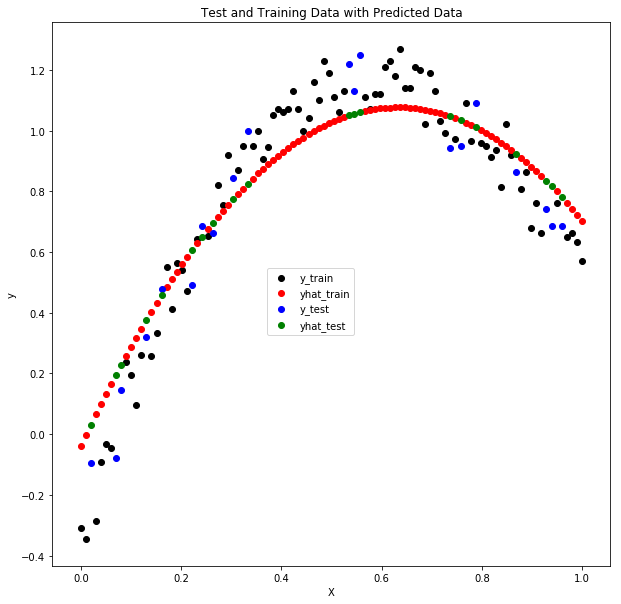

In [38]:
# Plot Training  and Test Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Test and Training Data with Predicted Data")
plt.ylabel('y')
plt.xlabel('X')
plt.scatter(X_parab_train[:,0], y_parab_train, color='k', label='y_train') 
plt.scatter(X_parab_train[:,0], y_hat_ridge_cv_parab_train,color='r',label='yhat_train') 
plt.scatter(X_parab_test[:,0], y_parab_test,color='b', label='y_test') 
plt.scatter(X_parab_test[:,0], y_hat_ridge_cv_parab_test,color='g',label='yhat_test')  
plt.figlegend(loc='center')

plt.show() 

# Summary of Results

In [39]:
print("------------------------------------");
print("Original Dataset Regression");
print("------------------------------------");

print("------------------------------------");
print("Linear Regression");
print("------------------------------------");
print("Training MSE :\t",mlr_orig_train_mse)
print("Test     MSE :\t",mlr_orig_test_mse)

print("------------------------------------");
print("Lasso Regression (with CV)");
print("------------------------------------");
print("Training MSE :\t",lasso_cv_orig_train_mse)
print("Test     MSE :\t",lasso_cv_orig_test_mse)

print("------------------------------------");
print("Ridge Regression (with CV)");
print("------------------------------------");
print("Training MSE :\t",ridge_cv_orig_train_mse)
print("Test     MSE :\t",ridge_cv_orig_test_mse)

------------------------------------
Original Dataset Regression
------------------------------------
------------------------------------
Linear Regression
------------------------------------
Training MSE :	 0.1042692674644882
Test     MSE :	 0.09708951737742094
------------------------------------
Lasso Regression (with CV)
------------------------------------
Training MSE :	 0.10427071916267183
Test     MSE :	 0.09707643194257873
------------------------------------
Ridge Regression (with CV)
------------------------------------
Training MSE :	 0.10428113595543317
Test     MSE :	 0.0970619212123902


In [40]:
print("------------------------------------");
print("Modified Dataset Regression");
print("------------------------------------");

print("------------------------------------");
print("Linear Regression");
print("------------------------------------");
print("Training MSE :\t",mlr_parab_train_mse)
print("Test     MSE :\t",mlr_parab_test_mse)

print("------------------------------------");
print("Lasso Regression (with CV");
print("------------------------------------");
print("Training MSE :\t",lasso_cv_parab_train_mse)
print("Test     MSE :\t",lasso_cv_parab_test_mse)

print("------------------------------------");
print("Ridge Regression (with CV");
print("------------------------------------");
print("Training MSE :\t",ridge_cv_parab_train_mse)
print("Test     MSE :\t",ridge_cv_parab_test_mse)

------------------------------------
Modified Dataset Regression
------------------------------------
------------------------------------
Linear Regression
------------------------------------
Training MSE :	 0.004735740085299895
Test     MSE :	 0.0060387050924853684
------------------------------------
Lasso Regression (with CV
------------------------------------
Training MSE :	 0.004738750830816757
Test     MSE :	 0.0059980499752864645
------------------------------------
Ridge Regression (with CV
------------------------------------
Training MSE :	 0.01565797568033097
Test     MSE :	 0.014263798864580946


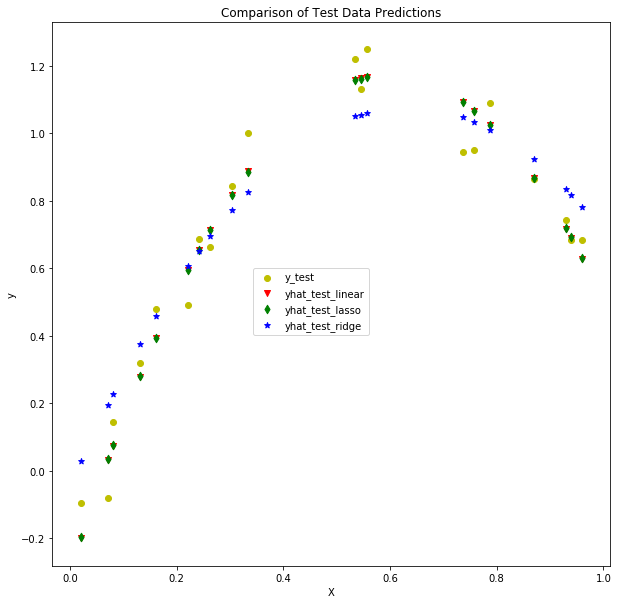

In [41]:
# Plot Training  and Test Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Comparison of Test Data Predictions")
plt.ylabel('y')
plt.xlabel('X')
plt.scatter(X_parab_test[:,0], y_parab_test,color='y', label='y_test', marker='o') 
plt.scatter(X_parab_test[:,0], yhat_parab_test,color='r',label='yhat_test_linear', marker='v') 
plt.scatter(X_parab_test[:,0], y_hat_lasso_cv_parab_test,color='g',label='yhat_test_lasso', marker='d')
plt.scatter(X_parab_test[:,0], y_hat_ridge_cv_parab_test,color='b',label='yhat_test_ridge', marker='*') 
plt.figlegend(loc='center')

plt.show() 

## R^2 Analysis
http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit
    
    

In [42]:
lasso_cv_parab.score(X_parab_test,y_parab_test)

0.9593858780767374

In [43]:
lasso_cv_parab.score(X_parab_train,y_parab_train)

0.9694749098718164

In [44]:
lasso_cv_orig.score(X_test,y_test)

0.3426740258857405

In [45]:
lasso_cv_orig.score(X_train,y_train)

0.32833077454243653